In [2]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Checking for missing values using isnull()
missing_summary_1 = df_train.isnull().sum()
missing_summary_2 = df_test.isnull().sum()

print("....train_data_set....\n")
print(missing_summary_1)
print("\n....test_data_set....\n")
print(missing_summary_2)


....train_data_set....

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes         

In [3]:
for column in df_train.columns:
    print(column)

Unnamed: 0
id
Gender
Customer Type
Age
Type of Travel
Class
Flight Distance
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness
Departure Delay in Minutes
Arrival Delay in Minutes
satisfaction


In [4]:
# Handling missing values
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == np.number:
            # Fill numerical columns with median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # Fill categorical columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Applying the function to fill missing values
df_train = fill_missing_values(df_train)

# Verifying that there are no more missing values
print("\nAfter Handling Missing Values:\n")
print(df_train.isnull().sum())

# Saving the cleaned training dataset
df_train.to_csv("train_cleaned.csv", index=False)
print("\nMissing values handled, and cleaned training dataset saved successfully!")

C:\Users\pasin\AppData\Local\Temp\ipykernel_22796\3868171561.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\pasin\AppData\Local\Temp\ipykernel_22796\3868171561.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\pasin\AppData\Local\Temp\ipykernel_22796\3868171561.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\pasin\AppData\Local\Temp\ipykernel_22796\3868171561.py:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype ==


After Handling Missing Values:

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                   

In [5]:
df_train = pd.read_csv("train_cleaned.csv")
df_train.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [6]:
num_duplicates = df_train.duplicated().sum()
num_duplicates

0

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Label Encoding for binary categorical variables
binary_cols = ['Gender', 'satisfaction']
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-class categorical variables
multi_class_cols = ['Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Display the first few rows of the transformed dataset
print(df.head())

# Save the encoded dataset if needed
encoded_file_path = "encoded_train.csv"
df.to_csv(encoded_file_path, index=False)
print(f"Encoded dataset saved to {encoded_file_path}")

#encoded
# Load the dataset
file_path = "test.csv"
df = pd.read_csv(file_path)

# Label Encoding for binary categorical variables
binary_cols = ['Gender', 'satisfaction']
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# One-Hot Encoding for multi-class categorical variables
multi_class_cols = ['Customer Type', 'Type of Travel', 'Class']
df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Display the first few rows of the transformed dataset
print(df.head())

# Save the encoded dataset if needed
encoded_file_path = "encoded_test.csv"
df.to_csv(encoded_file_path, index=False)
print(f"Encoded dataset saved to {encoded_file_path}")



   Unnamed: 0      id  Gender  Age  Flight Distance  Inflight wifi service  \
0           0   70172       1   13              460                      3   
1           1    5047       1   25              235                      3   
2           2  110028       0   26             1142                      2   
3           3   24026       0   25              562                      2   
4           4  119299       1   61              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  ...  Checkin service  Inflight servic

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.9653526331998769
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.97      0.97      0.97     25976



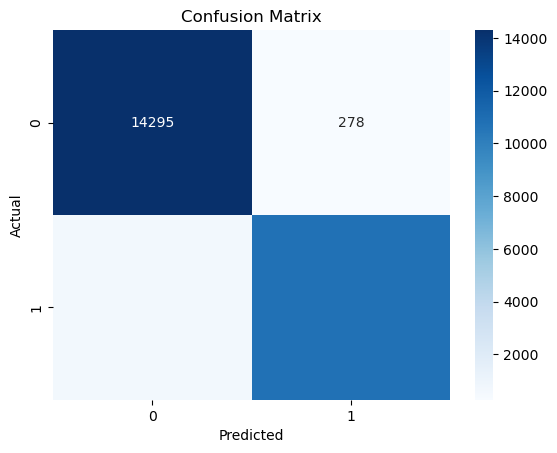

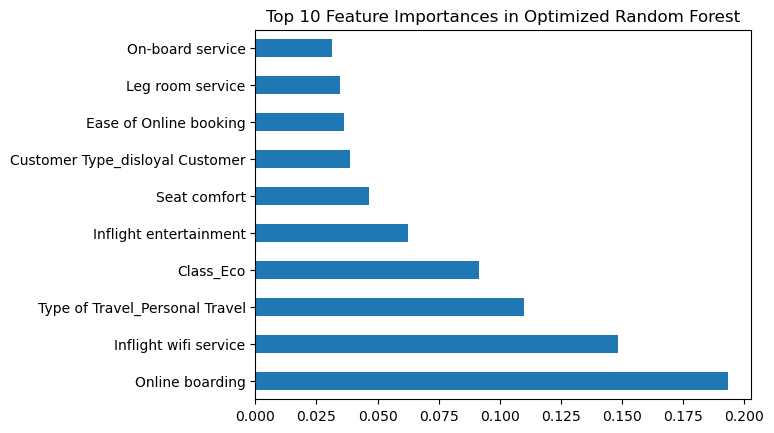

Predictions saved to rf_test_predictions.csv


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the encoded training dataset
train_file_path = "encoded_train.csv"
df_train = pd.read_csv(train_file_path)

# Load the test dataset
test_file_path = "encoded_test.csv"
df_test = pd.read_csv(test_file_path)

# Define target and features
TARGET_COLUMN = 'satisfaction'  # Adjust based on your dataset
X_train = df_train.drop(columns=[TARGET_COLUMN])
y_train = df_train[TARGET_COLUMN]

X_test = df_test.drop(columns=[TARGET_COLUMN], errors='ignore')

# Handle missing values if any
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search CV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3,  # 3-fold cross-validation
    verbose=2, 
    n_jobs=-1  # Use all CPU cores
)

# Fit the model using exhaustive search over parameters
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
y_test_pred = best_rf.predict(X_test)

# Check if actual test labels are available
if TARGET_COLUMN in df_test.columns:
    y_test = df_test[TARGET_COLUMN]
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Test dataset does not contain actual labels; accuracy and confusion matrix cannot be calculated.")

# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Optimized Random Forest")
plt.show()

# Predict on test dataset
df_test[TARGET_COLUMN] = y_test_pred  # Add predictions to test dataset

# Save predictions
predictions_file_path = "rf_test_predictions.csv"
df_test.to_csv(predictions_file_path, index=False)
print(f"Predictions saved to {predictions_file_path}")


In [ ]:
# Function to get user input and predict satisfaction
def predict_satisfaction(model, features):
    input_data = {}
    for feature in features:
        value = input(f"Enter the value for {feature}: ")
        input_data[feature] = [float(value)]
    input_df = pd.DataFrame(input_data)
    prediction = model.predict(input_df)
    
    if prediction == 1:
        return "Satisfied"
    else:
        # Identify the weakest areas based on feature importance
        weak_areas = input_df.iloc[0][top_features.index].sort_values().index.tolist()
        return f"Not Satisfied. Suggested improvements: {', '.join(weak_areas[:3])}"

# Example usage
features = X_train.columns.tolist()
print("Please enter the following details to predict passenger satisfaction:")
result = predict_satisfaction(best_rf, features)
print(f"The passenger is predicted to be: {result}")

Please enter the following details to predict passenger satisfaction:


....train_data_set....

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes         

C:\Users\pasin\AppData\Local\Temp\ipykernel_10140\2274883090.py:26: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\pasin\AppData\Local\Temp\ipykernel_10140\2274883090.py:26: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\pasin\AppData\Local\Temp\ipykernel_10140\2274883090.py:26: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
C:\Users\pasin\AppData\Local\Temp\ipykernel_10140\2274883090.py:26: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtyp

Best Hyperparameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.9653526331998769
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.95      0.96     11403

    accuracy                           0.97     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.97      0.97      0.97     25976



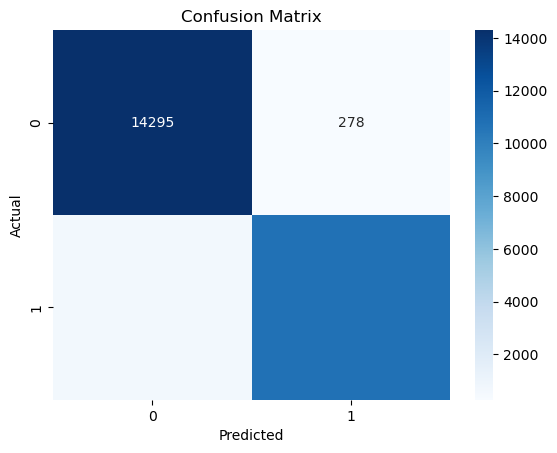

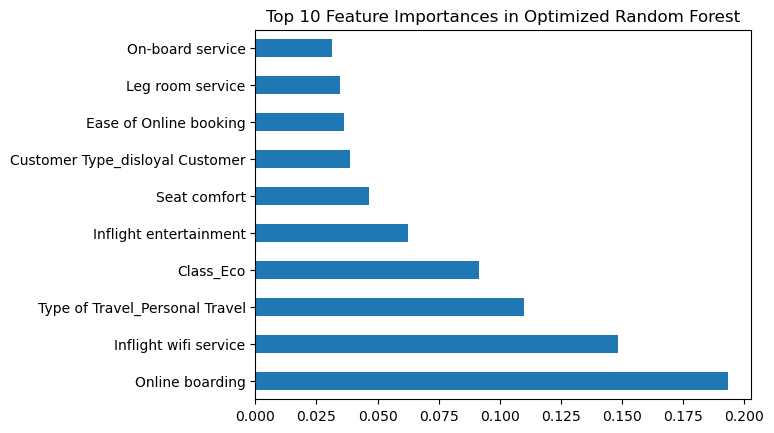

Predictions saved to rf_test_predictions.csv


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the datasets
train_file_path = "train.csv"
test_file_path = "test.csv"

df_train = pd.read_csv(train_file_path)
df_test = pd.read_csv(test_file_path)

# Checking for missing values
print("....train_data_set....\n")
print(df_train.isnull().sum())
print("\n....test_data_set....\n")
print(df_test.isnull().sum())

# Handling missing values function
def fill_missing_values(df):
    for column in df.columns:
        if df[column].dtype == np.number:
            # Fill numerical columns with median
            df[column].fillna(df[column].median(), inplace=True)
        else:
            # Fill categorical columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Apply the function to handle missing values
df_train = fill_missing_values(df_train)
df_test = fill_missing_values(df_test)

# Label Encoding for binary categorical variables
from sklearn.preprocessing import LabelEncoder
binary_cols = ['Gender', 'satisfaction']
label_encoder = LabelEncoder()
for col in binary_cols:
    df_train[col] = label_encoder.fit_transform(df_train[col])
    df_test[col] = label_encoder.transform(df_test[col])  # Transform test with same encoder

# One-Hot Encoding for multi-class categorical variables
multi_class_cols = ['Customer Type', 'Type of Travel', 'Class']
df_train = pd.get_dummies(df_train, columns=multi_class_cols, drop_first=True)
df_test = pd.get_dummies(df_test, columns=multi_class_cols, drop_first=True)

# Define target and features
TARGET_COLUMN = 'satisfaction'  # Adjust based on your dataset
X_train = df_train.drop(columns=[TARGET_COLUMN])
y_train = df_train[TARGET_COLUMN]
X_test = df_test.drop(columns=[TARGET_COLUMN], errors='ignore')

# Handle missing values if any
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Min samples to split
    'min_samples_leaf': [1, 2, 4],  # Min samples per leaf
    'bootstrap': [True, False]  # Bootstrap sampling
}

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search CV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3,  # 3-fold cross-validation
    verbose=2, 
    n_jobs=-1  # Use all CPU cores
)

# Fit the model using exhaustive search over parameters
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on test set
y_test_pred = best_rf.predict(X_test)

# Check if actual test labels are available
if TARGET_COLUMN in df_test.columns:
    y_test = df_test[TARGET_COLUMN]
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
else:
    print("Test dataset does not contain actual labels; accuracy and confusion matrix cannot be calculated.")

# Feature Importance
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances in Optimized Random Forest")
plt.show()

# Predict on test dataset
df_test[TARGET_COLUMN] = y_test_pred  # Add predictions to test dataset

# Save predictions
predictions_file_path = "rf_test_predictions.csv"
df_test.to_csv(predictions_file_path, index=False)
print(f"Predictions saved to {predictions_file_path}")
